In [21]:
## Load the dataset
import pandas as pd
df= pd.read_csv('mcdonalds.csv')


In [22]:
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [24]:
df.shape

(1453, 15)

In [25]:
import numpy as np

df1 = df.iloc[:, 0:11]  # Select columns 1 to 11 (0-indexed in Python)

# Convert "Yes" to 1 and everything else to 0
df1= (df == "Yes").astype(int)

# Calculate column-wise means and round to 2 decimal places
df_means = df1.mean().round(2)

print(df_means)


yummy             0.55
convenient        0.91
spicy             0.09
fattening         0.87
greasy            0.53
fast              0.90
cheap             0.60
tasty             0.64
expensive         0.36
healthy           0.20
disgusting        0.24
Like              0.00
Age               0.00
VisitFrequency    0.00
Gender            0.00
dtype: float64


In [26]:
from sklearn.decomposition import PCA
pca = PCA()
df_pca= pca.fit(df1)

## Create a Summary as shown in the pdf
std_deviation=np.sqrt(pca.explained_variance_)
explained_variance=pca.explained_variance_ratio_
cumulative_variance=explained_variance.cumsum()

## Combine the dataframe 
summary_df=pd.DataFrame({
    "Standard Deviation": std_deviation,
    'Proportion of Variance':explained_variance,
    "Cumulative proportion":cumulative_variance
},index=[f'PC{i+1}' for i in range(len(std_deviation))])


In [27]:
summary_df

,Standard Deviation,Proportion of Variance,Cumulative proportion
PC1,0.757050,0.299447,0.299447
PC2,0.607456,0.192797,0.492244
PC3,0.504619,0.133045,0.625290
PC4,0.398799,0.083096,0.708386
PC5,0.337405,0.059481,0.767866
PC6,0.310275,0.050300,0.818166
PC7,0.289697,0.043849,0.862015
PC8,0.275122,0.039548,0.901563
PC9,0.265251,0.036761,0.938323
PC10,0.248842,0.032353,0.970677


In [28]:
## Rounding of the standard deviation 
print(np.round(std_deviation,1))

[0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2 0.  0.  0.  0. ]


In [29]:
# Get the PCA components (loadings)
loadings = pd.DataFrame(
    pca.components_.T,  # Perform transpose to match R's rotation format (variables as rows)
    columns=[f'PC{i+1}' for i in range(len(pca.components_))],
    index=df.columns  # Use the same variables names 
)

# Optionally, round the values to 3 decimal places such that the output is same as R output
loadings = loadings.round(3)

print(loadings)


                  PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8    PC9  \
yummy           0.477 -0.364  0.304  0.055  0.308 -0.171 -0.281 -0.013 -0.572   
convenient      0.155 -0.016  0.063 -0.142 -0.278  0.348 -0.060  0.113  0.018   
spicy           0.006 -0.019  0.037  0.198 -0.071  0.355  0.708 -0.376 -0.400   
fattening      -0.116  0.034  0.322 -0.354  0.073  0.407 -0.386 -0.590  0.161   
greasy         -0.304  0.064  0.802  0.254 -0.361 -0.209  0.036  0.138  0.003   
fast            0.108  0.087  0.065 -0.097 -0.108  0.595 -0.087  0.628 -0.166   
cheap           0.337  0.611  0.149  0.119  0.129  0.103 -0.040 -0.140 -0.076   
tasty           0.472 -0.307  0.287 -0.003  0.211  0.077  0.360  0.073  0.639   
expensive      -0.329 -0.601 -0.024  0.068  0.003  0.261 -0.068 -0.030 -0.067   
healthy         0.214 -0.077 -0.192  0.763 -0.288  0.178 -0.350 -0.176  0.186   
disgusting     -0.375  0.140  0.089  0.370  0.729  0.211 -0.027  0.167  0.072   
Like           -0.000 -0.000

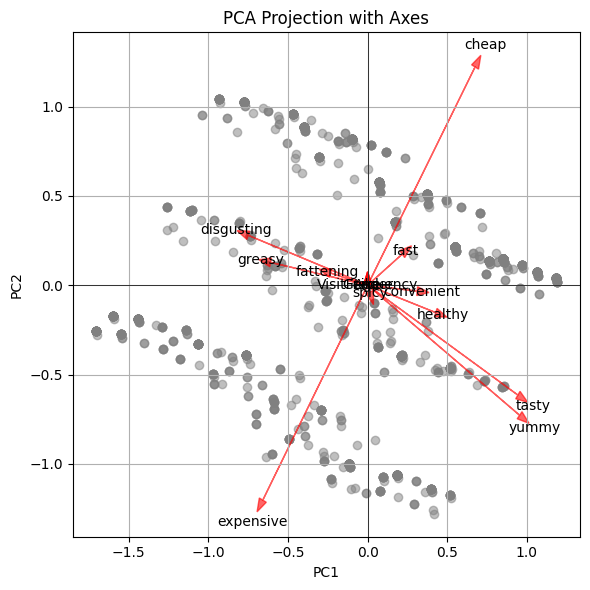

In [30]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 1: Project the data onto the first two principal components
scores = pca.transform(df1)

# Step 2: Plot the PCA scores 
plt.figure(figsize=(6, 6))
plt.scatter(scores[:, 0], scores[:, 1], color='grey', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection with Axes')

# Step 3: Add variable axes (like in R)
loadings = pca.components_.T  # shape: (n_features, n_components)

for i, feature in enumerate(df1.columns):
    plt.arrow(0, 0,                    # start at origin
              loadings[i, 0]*2,        # scale arrow for visibility
              loadings[i, 1]*2,
              color='red', alpha=0.6, head_width=0.05)
    plt.text(loadings[i, 0]*2.2, loadings[i, 1]*2.2, 
             feature, color='black', ha='center', va='center')

plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.tight_layout()
plt.show()


In [31]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import random

# Set seed
random.seed(1234)
np.random.seed(1234)

# Run k-means for k = 2 to 8, with 10 random initializations
best_score = -1
best_model = None
best_k = None

for k in range(2, 9):  # 2 to 8
    model = KMeans(n_clusters=k, n_init=10, random_state=1234)
    labels = model.fit_predict(df1)
    score = silhouette_score(df1, labels)  # Similar to what stepFlexclust optimizes

    if score > best_score:
        best_score = score
        best_model = model
        best_k = k

# Assign best model
model = best_model
labels = model.labels_

print(f"Best number of clusters: {best_k}")


Best number of clusters: 8


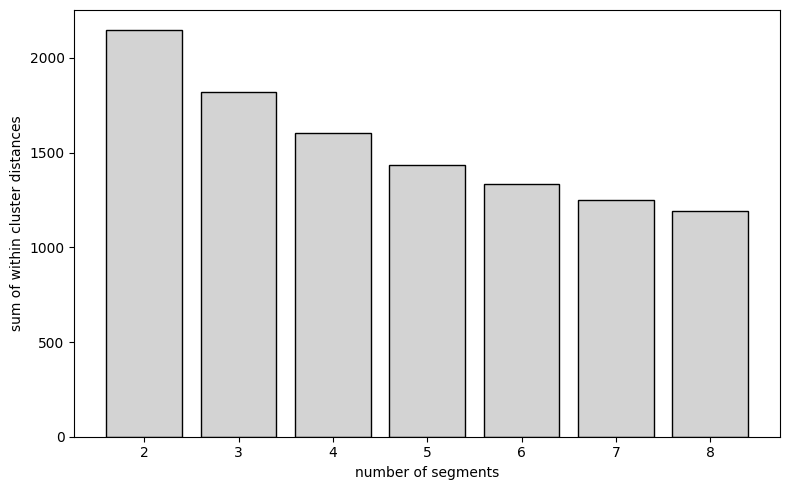

In [32]:

from sklearn.cluster import KMeans

# Set random seed
np.random.seed(1234)

# Range of clusters
k_values = range(2, 9)

# Store within-cluster sum of squares (inertia)
wss = []

for k in k_values:
    model = KMeans(n_clusters=k, n_init=10, random_state=1234)
    model.fit(df1)
    wss.append(model.inertia_)

# Plot - to match the R output style
plt.figure(figsize=(8, 5))
plt.bar(k_values, wss, color='lightgray', edgecolor='black')
plt.xlabel("number of segments")
plt.ylabel("sum of within cluster distances")
plt.title("")  # No title to match R default
plt.xticks(k_values)
plt.tight_layout()
plt.show()


C:\Users\Shrimanth\AppData\Local\Temp\ipykernel_10036\3152767692.py:33: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(all_ari, labels=k_list, patch_artist=True,


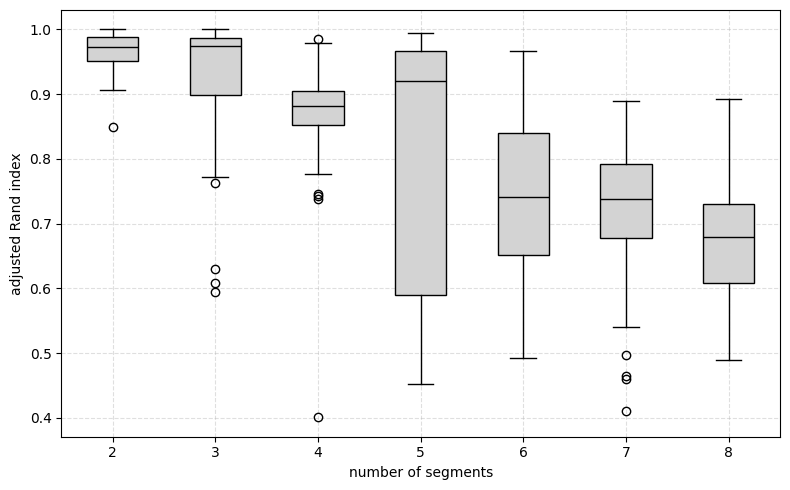

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

np.random.seed(1234)

k_list = range(2, 9)
n_boot = 100
all_ari = []

for k in k_list:
    # Fit on full data
    model = KMeans(n_clusters=k, n_init=10, random_state=1234)
    original_labels = model.fit_predict(df1)

    ari_k = []

    for _ in range(n_boot):
        # Manual bootstrap sampling with indices
        indices = np.random.choice(len(df1), size=len(df1), replace=True)
        X_boot = df1.iloc[indices]
        boot_labels = KMeans(n_clusters=k, n_init=10, random_state=1234).fit_predict(X_boot)
        
        # Compare only the bootstrapped samples
        ari = adjusted_rand_score(original_labels[indices], boot_labels)
        ari_k.append(ari)

    all_ari.append(ari_k)

# Plot ARI boxplot
plt.figure(figsize=(8, 5))
plt.boxplot(all_ari, labels=k_list, patch_artist=True,
            boxprops=dict(facecolor='lightgray', color='black'),
            medianprops=dict(color='black'))
plt.xlabel("number of segments")
plt.ylabel("adjusted Rand index")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


Best number of clusters (by silhouette): 8


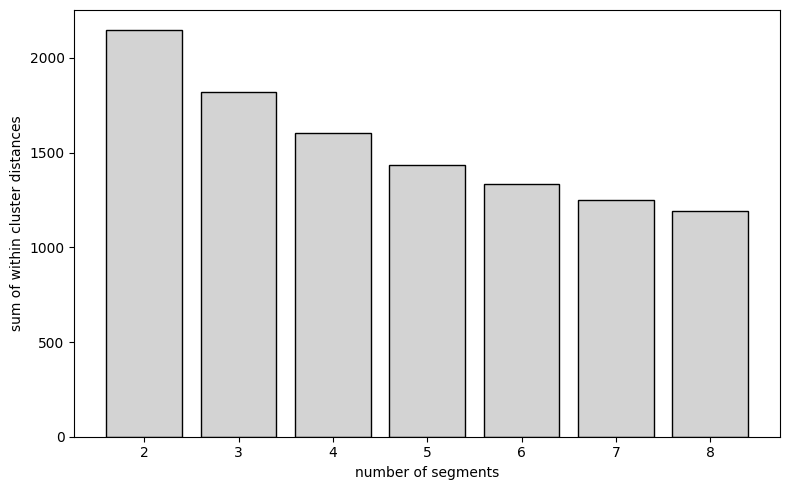

C:\Users\Shrimanth\AppData\Local\Temp\ipykernel_10036\168676656.py:59: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(all_ari, labels=k_range, patch_artist=True,


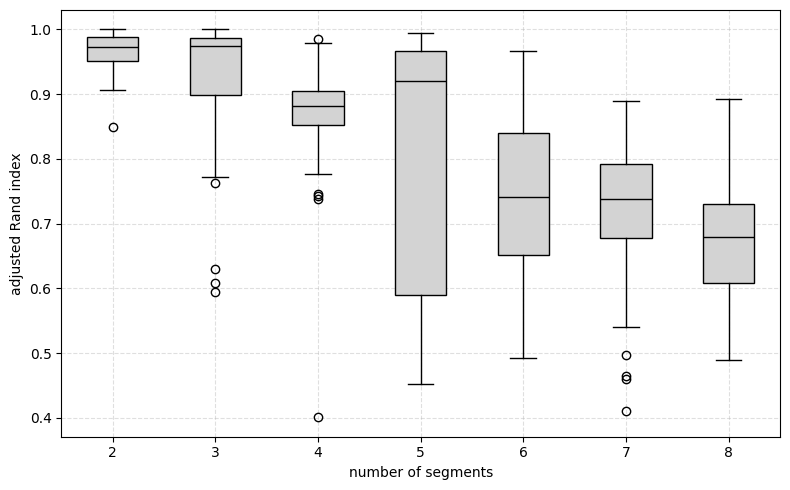

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Set random seed
np.random.seed(1234)

def compute_wss_silhouette(df1, k_range):
    """Compute WSS and silhouette scores for k in range"""
    wss = []
    silhouettes = []
    models = []

    for k in k_range:
        model = KMeans(n_clusters=k, n_init=10, random_state=1234)
        labels = model.fit_predict(df1)
        wss.append(model.inertia_)
        silhouettes.append(silhouette_score(df1, labels))
        models.append((model, labels))

    best_k = k_range[np.argmax(silhouettes)]
    best_model = models[np.argmax(silhouettes)][0]
    return wss, silhouettes, best_k, best_model

def plot_wss(k_range, wss):
    """Bar plot of WSS (like R's plot)"""
    plt.figure(figsize=(8, 5))
    plt.bar(k_range, wss, color='lightgray', edgecolor='black')
    plt.xlabel("number of segments")
    plt.ylabel("sum of within cluster distances")
    plt.xticks(k_range)
    plt.tight_layout()
    plt.show()

def compute_ari_bootstrap(df, k_range, n_boot=100):
    """Compute bootstrapped ARI scores for range of k"""
    all_ari = []

    for k in k_range:
        model = KMeans(n_clusters=k, n_init=10, random_state=1234)
        original_labels = model.fit_predict(df1)
        ari_k = []

        for _ in range(n_boot):
            indices = np.random.choice(len(df1), size=len(df1), replace=True)
            X_boot = df1.iloc[indices]
            boot_labels = KMeans(n_clusters=k, n_init=10, random_state=1234).fit_predict(X_boot)
            ari = adjusted_rand_score(original_labels[indices], boot_labels)
            ari_k.append(ari)

        all_ari.append(ari_k)
    return all_ari

def plot_ari_boxplot(all_ari, k_range):
    """Boxplot of ARI scores per k"""
    plt.figure(figsize=(8, 5))
    plt.boxplot(all_ari, labels=k_range, patch_artist=True,
                boxprops=dict(facecolor='lightgray', color='black'),
                medianprops=dict(color='black'))
    plt.xlabel("number of segments")
    plt.ylabel("adjusted Rand index")
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

# ==== RUN ALL ====

k_values = list(range(2, 9))

# 1. WSS and Silhouette Evaluation
wss, silhouettes, best_k, best_model = compute_wss_silhouette(df1, k_values)
print(f"Best number of clusters (by silhouette): {best_k}")

# 2. Plot WSS Bar Chart
plot_wss(k_values, wss)

# 3. Bootstrap ARI Scores
ari_scores = compute_ari_bootstrap(df, k_values, n_boot=100)

# 4. Plot ARI Boxplot
plot_ari_boxplot(ari_scores, k_values)


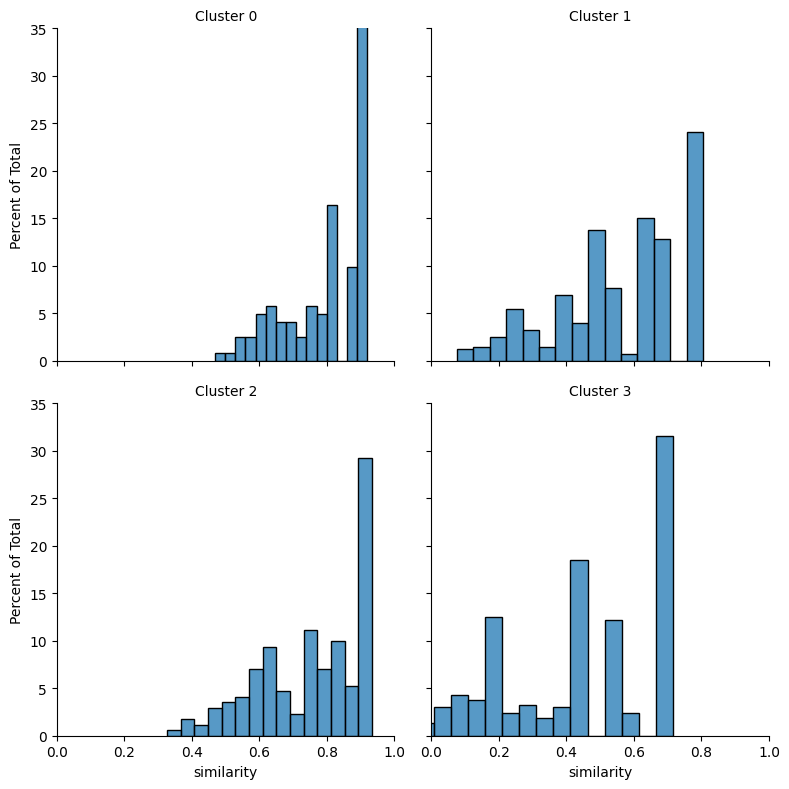

In [35]:
## Cluster visualisation 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler


# Preprocess: assuming only numeric columns are used
df_numeric = df1.select_dtypes(include='number')

# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Perform KMeans clustering (4 clusters)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# Calculate cosine similarity between each point and its cluster center
similarities = []
for i in range(len(df_scaled)):
    sim = cosine_similarity(
        df_scaled[i].reshape(1, -1), 
        kmeans.cluster_centers_[clusters[i]].reshape(1, -1)
    )[0][0]
    similarities.append(sim)

# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'Similarity': similarities,
    'Cluster': clusters
})

# Plot
g = sns.FacetGrid(plot_df, col="Cluster", col_wrap=2, height=4, sharex=True, sharey=True)
g.map_dataframe(sns.histplot, x="Similarity", stat="percent", bins=15, edgecolor='black')
g.set(xlim=(0, 1), ylim=(0, 35))
g.set_axis_labels("similarity", "Percent of Total")
g.set_titles("Cluster {col_name}")
plt.tight_layout()
plt.show()



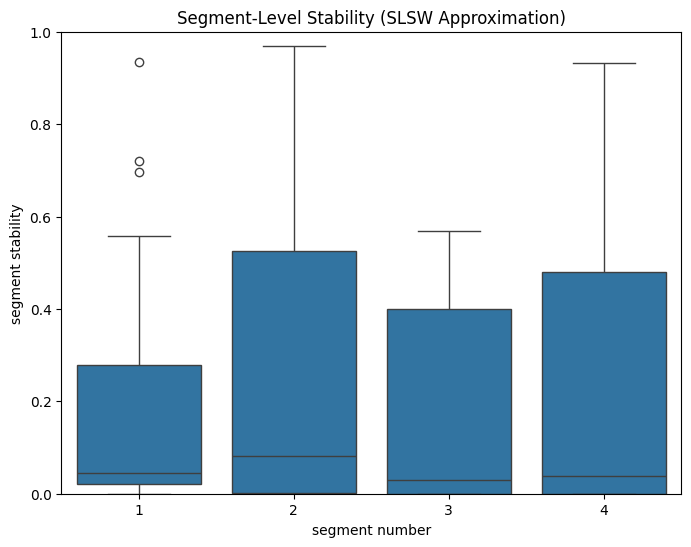

In [36]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import pairwise_distances_argmin
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess data
df_numeric = df1.select_dtypes(include='number')
X = df_numeric.to_numpy()

# Run base KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
base_labels = kmeans.fit_predict(X)
base_centers = kmeans.cluster_centers_

# Collect per-cluster stability scores
n_bootstraps = 30
stability_per_cluster = {i: [] for i in range(4)}

# Run clustering on bootstrapped samples
for _ in range(n_bootstraps):
    # Resample data
    X_boot = resample(X, replace=True)

    # Fit KMeans to the bootstrapped sample
    km = KMeans(n_clusters=4, random_state=None).fit(X_boot)

    # Assign original data to closest cluster in bootstrap model
    labels_boot = pairwise_distances_argmin(X, km.cluster_centers_)

    # Compare current bootstrap labels with base labels
    for i in range(4):
        mask = base_labels == i
        if np.sum(mask) == 0:
            continue
        # Stability = proportion of points in the same cluster in both runs
        stability = np.mean(labels_boot[mask] == base_labels[mask])
        stability_per_cluster[i].append(stability)

# Prepare data for plotting
plot_data = []
for cluster_id, scores in stability_per_cluster.items():
    for score in scores:
        plot_data.append({'segment number': cluster_id + 1, 'segment stability': score})

plot_df = pd.DataFrame(plot_data)

# Plot boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='segment number', y='segment stability', data=plot_df)
plt.ylim(0, 1)
plt.xlabel("segment number")
plt.ylabel("segment stability")
plt.title("Segment-Level Stability (SLSW Approximation)")
plt.show()


In [37]:
df1

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0
1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0
2,0,1,1,1,1,1,0,1,1,1,0,0,0,0,0
3,1,1,0,1,1,1,1,1,0,0,1,0,0,0,0
4,0,1,0,1,1,1,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0
1449,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0
1450,1,1,0,1,0,1,0,1,1,0,0,0,0,0,0
1451,1,1,0,0,0,1,1,1,0,1,0,0,0,0,0


In [38]:
def compute_icl(model, X):
    log_likelihood = model.score(X) * len(X)
    bic = model.bic(X)
    log_resp = model.predict_proba(X)
    entropy = -np.sum(log_resp * np.log(log_resp + 1e-10))  # avoid log(0)
    icl = bic + entropy
    return icl


In [40]:
from sklearn.mixture import GaussianMixture

results = []

for k in range(2, 9):
    gm = GaussianMixture(n_components=k, covariance_type='diag', n_init=10, random_state=1234)
    gm.fit(df1)

    log_likelihood = gm.score(df1) * len(df1)
    aic = gm.aic(df1)
    bic = gm.bic(df1)
    icl = compute_icl(gm, df1)
    
    results.append({
        'k': k,
        'logLik': log_likelihood,
        'AIC': aic,
        'BIC': bic,
        'ICL': icl,
        'converged': gm.converged_,
        'n_iter': gm.n_iter_
    })


In [41]:
results_df = pd.DataFrame(results)
results_df = results_df[['n_iter', 'converged', 'k', 'logLik', 'AIC', 'BIC', 'ICL']]

# Optional: round for readability
results_df_rounded = results_df.copy()
results_df_rounded[['logLik', 'AIC', 'BIC', 'ICL']] = results_df_rounded[['logLik', 'AIC', 'BIC', 'ICL']].round(2)

print(results_df_rounded.to_string(index=False))


 n_iter  converged  k   logLik        AIC        BIC        ICL
      6       True  2 44690.25  -89258.50  -88936.34  -88936.34
      8       True  3 47706.14  -95228.28  -94742.39  -94742.37
     11       True  4 53748.52 -107251.04 -106601.43 -106597.87
      9       True  5 57751.51 -115195.03 -114381.69 -114381.69
      6       True  6 63965.42 -127560.83 -126583.78 -126583.71
     14       True  7 61070.97 -121709.94 -120569.16 -120562.89
      8       True  8 61539.96 -122585.92 -121281.42 -121271.32


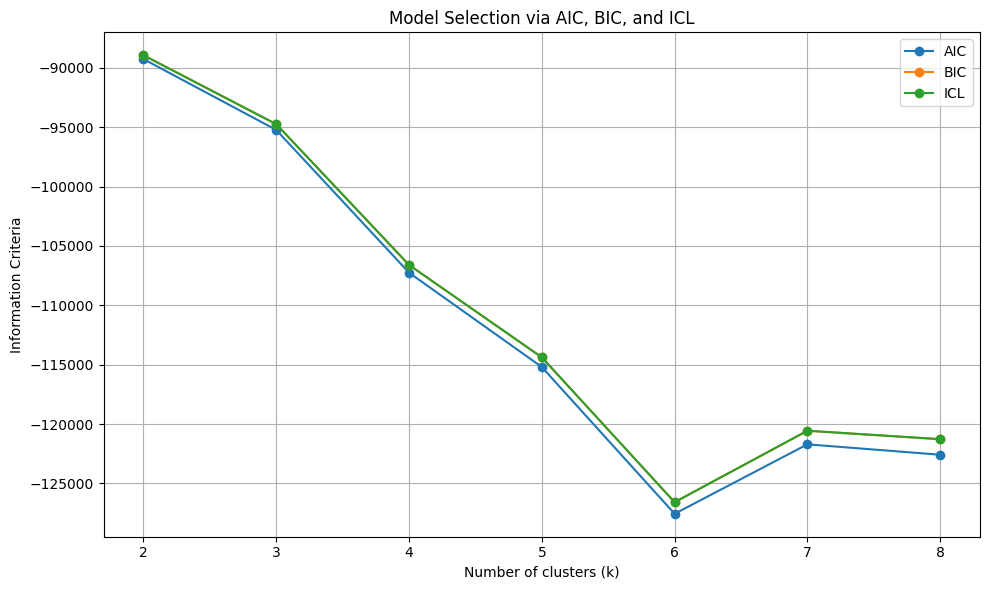

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(results_df['k'], results_df['AIC'], label='AIC', marker='o')
plt.plot(results_df['k'], results_df['BIC'], label='BIC', marker='o')
plt.plot(results_df['k'], results_df['ICL'], label='ICL', marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Information Criteria')
plt.title('Model Selection via AIC, BIC, and ICL')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [43]:
from sklearn.cluster import KMeans

kmeans4 = KMeans(n_clusters=4, n_init=10, random_state=1234)
kmeans_labels = kmeans4.fit_predict(df1)


In [44]:
gmm4 = GaussianMixture(n_components=4, covariance_type='diag', n_init=10, random_state=1234)
gmm_labels = gmm4.fit_predict(df1)


In [45]:
import pandas as pd

ct = pd.crosstab(kmeans_labels, gmm_labels, rownames=['kmeans'], colnames=['mixture'])
print(ct)


mixture    0   1    2    3
kmeans                    
0         17   8   82  257
1          0  24  216    0
2        230  16    0  287
3        271  45    0    0


In [46]:
from sklearn.cluster import KMeans

kmeans4 = KMeans(n_clusters=4, n_init=10, random_state=1234)
kmeans_labels = kmeans4.fit_predict(df1)


In [47]:
import numpy as np
from sklearn.mixture import GaussianMixture

# Assuming MD_x is a binary matrix (n_samples x n_features)
n_components = 4
means_init = np.array([df1[kmeans_labels == i].mean(axis=0) for i in range(n_components)])
weights_init = np.array([(kmeans_labels == i).sum() for i in range(n_components)]) / len(df1)

gmm_init = GaussianMixture(
    n_components=n_components,
    covariance_type='diag',
    max_iter=100,
    random_state=1234,
    init_params='random'  # so it uses our provided init, not default kmeans
)

# Set initial parameters
gmm_init.weights_init = weights_init
gmm_init.means_init = means_init

gmm_init.fit(df1)
gmm_labels = gmm_init.predict(df1)


In [48]:
import pandas as pd

ct = pd.crosstab(kmeans_labels, gmm_labels, rownames=['kmeans'], colnames=['mixture'])
print(ct)


mixture    0   1    2    3
kmeans                    
0        264   6   79   15
1         15  75    0  150
2         42   0  459   32
3          7  13   16  280


In [49]:
log_likelihood = gmm_init.score(df1) * len(df1)  # for MD.m4a
print(f"logLik: {log_likelihood:.3f}")


logLik: 51737.172


In [50]:
log_likelihood_ref = gmm4.score(df1) * len(df1)  # for MD.m4
print(f"logLik: {log_likelihood_ref:.3f}")


logLik: 53748.521


In [51]:
# df = (n_components - 1) for weights +
#      n_components * n_features for means +
#      n_components * n_features for diagonal covariances (if covariance_type='diag')
n_samples, n_features = df1.shape
n_components = gmm_init.n_components

df1 = (n_components - 1) + (n_components * n_features) * 2
print(f"Degrees of freedom (approx): {df1}")


Degrees of freedom (approx): 123


In [52]:
# Start from your original DataFrame

# Map string ratings to numeric scale
like_numeric_map = {
    "I hate it!": -5, "-5": -5, "-4": -4, "-3": -3, "-2": -2,
    "-1": -1, "0": 0, "+1": 1, "+2": 2, "+3": 3, "+4": 4, "I love it!": 5
}

# Clean the 'Like' column: strip whitespace and convert to string
df['Like'] = df['Like'].astype(str).str.strip()

# Apply the mapping
df['Like_num'] = df['Like'].map(like_numeric_map)

# Compute Like_n as: 6 - mapped value
df['Like_n'] = 6 - df['Like_num']

# Check if it's working now
print(df['Like'].unique())
print(df['Like_num'].unique())
print(df['Like_n'].value_counts().sort_index())


['-3' '+2' '+1' '+4' 'I love it!+5' 'I hate it!-5' '-2' '+3' '0' '-4' '-1']
[-3.  2.  1.  4. nan -2.  3.  0. -4. -1.]
Like_n
2.0     160
3.0     229
4.0     187
5.0     152
6.0     169
7.0      58
8.0      59
9.0      73
10.0     71
Name: count, dtype: int64


In [53]:
predictor_cols = df.columns[:11].tolist()  # or specify them manually if needed

# Keep only rows without missing values
df1 = df[['Like_n'] + predictor_cols].dropna()

from patsy import dmatrices
import statsmodels.api as sm

formula = 'Like_n ~ ' + ' + '.join(predictor_cols)
y, X = dmatrices(formula, data=df1, return_type='dataframe')

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Like_n   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     97.50
Date:                Sat, 19 Apr 2025   Prob (F-statistic):          7.95e-156
Time:                        11:41:33   Log-Likelihood:                -2252.1
No. Observations:                1158   AIC:                             4528.
Df Residuals:                    1146   BIC:                             4589.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             6.8765      0.31

In [54]:
import pandas as pd
from sklearn.mixture import GaussianMixture
from patsy import dmatrices
import statsmodels.api as sm
import numpy as np

# Define formula and build model matrix
formula = 'Like_n ~ ' + ' + '.join(predictor_cols)
y, X = dmatrices(formula, data=df1, return_type='dataframe')

# Stack X and y together to cluster on full regression input
data_for_clustering = np.hstack((X, y))

# Fit Gaussian Mixture Model with k=2 components
gmm = GaussianMixture(n_components=2, n_init=10, random_state=1234)
gmm.fit(data_for_clustering)

# Get cluster assignments
df1['cluster'] = gmm.predict(data_for_clustering)

# Cluster sizes
cluster_sizes = df1['cluster'].value_counts().sort_index()
print("Cluster sizes:")
print(cluster_sizes)

# Optional: fit separate regression models to each cluster
models = {}
for cluster_id in sorted(df1['cluster'].unique()):
    cluster_data = df1[df1['cluster'] == cluster_id]
    y_c, X_c = dmatrices(formula, data=cluster_data, return_type='dataframe')
    model = sm.OLS(y_c, X_c).fit()
    models[cluster_id] = model
    print(f"\nCluster {cluster_id + 1} Regression Summary:")
    print(model.summary())


Cluster sizes:
cluster
0    915
1    243
Name: count, dtype: int64

Cluster 1 Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                 Like_n   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     55.54
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           1.78e-80
Time:                        11:41:38   Log-Likelihood:                -1741.6
No. Observations:                 915   AIC:                             3503.
Df Residuals:                     905   BIC:                             3551.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

C:\Users\Shrimanth\AppData\Local\Temp\ipykernel_10036\3246312417.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coef.', y='Variable', data=summary_frame, palette='coolwarm', orient='h')


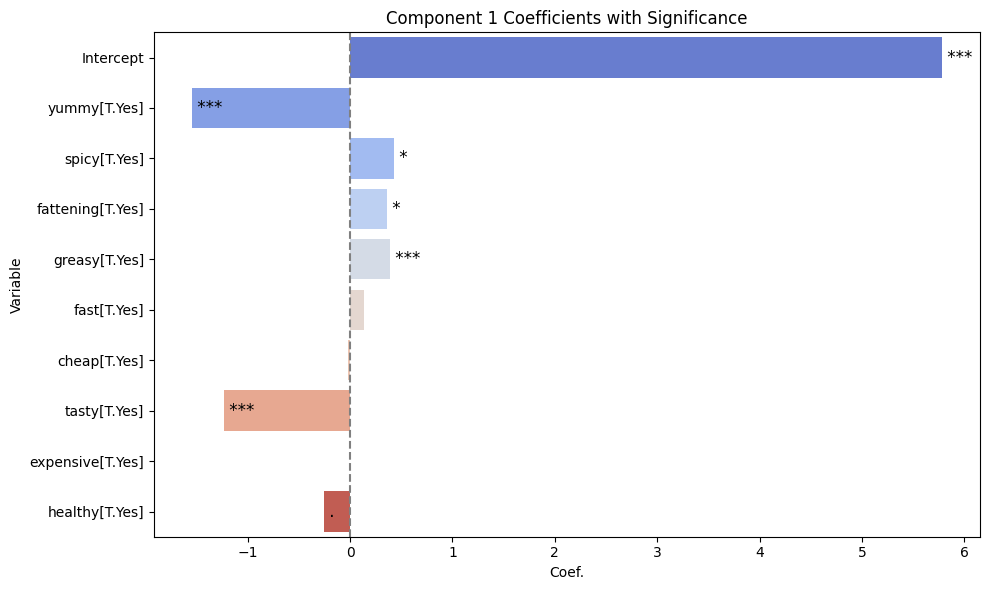

C:\Users\Shrimanth\AppData\Local\Temp\ipykernel_10036\3246312417.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coef.', y='Variable', data=summary_frame, palette='coolwarm', orient='h')


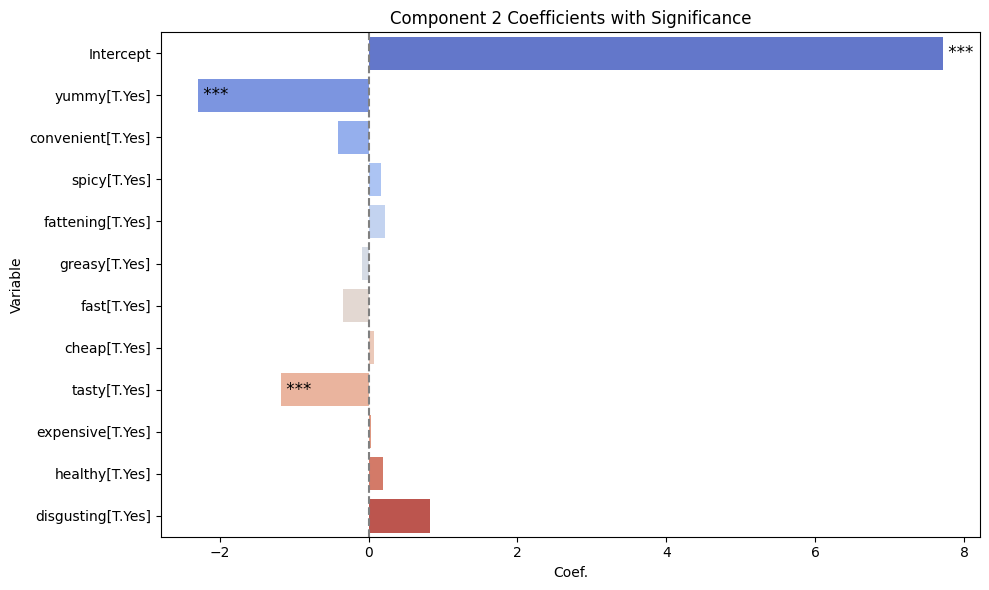

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Plot coefficients with significance for each component
for cluster_id, model in models.items():
    summary_frame = model.summary2().tables[1].copy()
    summary_frame['Variable'] = summary_frame.index
    summary_frame['Significance'] = summary_frame['P>|t|'].apply(
        lambda p: '***' if p < 0.001 else '**' if p < 0.01 else '*' if p < 0.05 else '.' if p < 0.1 else ''
    )

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Coef.', y='Variable', data=summary_frame, palette='coolwarm', orient='h')
    for i, (coef, sig) in enumerate(zip(summary_frame['Coef.'], summary_frame['Significance'])):
        plt.text(coef, i, f' {sig}', va='center', fontsize=12)
    
    plt.title(f'Component {cluster_id + 1} Coefficients with Significance')
    plt.axvline(0, color='gray', linestyle='--')
    plt.tight_layout()
    plt.show()


In [56]:
import pandas as pd
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming df1 is your binary attribute data (e.g. 'Yes'/'No' converted to 1/0)
df_bin = df1.replace({'Yes': 1, 'No': 0})

# Run k-means clustering
kmeans_model = KMeans(n_clusters=4, n_init=10, random_state=1234)
clusters = kmeans_model.fit_predict(df_bin)

# Add cluster assignments to your dataframe
df_bin['Cluster'] = clusters


C:\Users\Shrimanth\AppData\Local\Temp\ipykernel_10036\753795429.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bin = df1.replace({'Yes': 1, 'No': 0})


In [57]:
# Group by cluster and compute mean of each attribute
cluster_profiles = df_bin.groupby('Cluster').mean().T  # shape: attributes x clusters

# Overall means for reference
overall_means = df_bin.drop('Cluster', axis=1).mean()


In [58]:
# Perform hierarchical clustering on attributes
distance_matrix = pdist(cluster_profiles.values, metric='euclidean')
linkage_matrix = linkage(distance_matrix, method='ward')
dendro = dendrogram(linkage_matrix, no_plot=True)
ordered_attributes = [cluster_profiles.index[i] for i in dendro['leaves']]


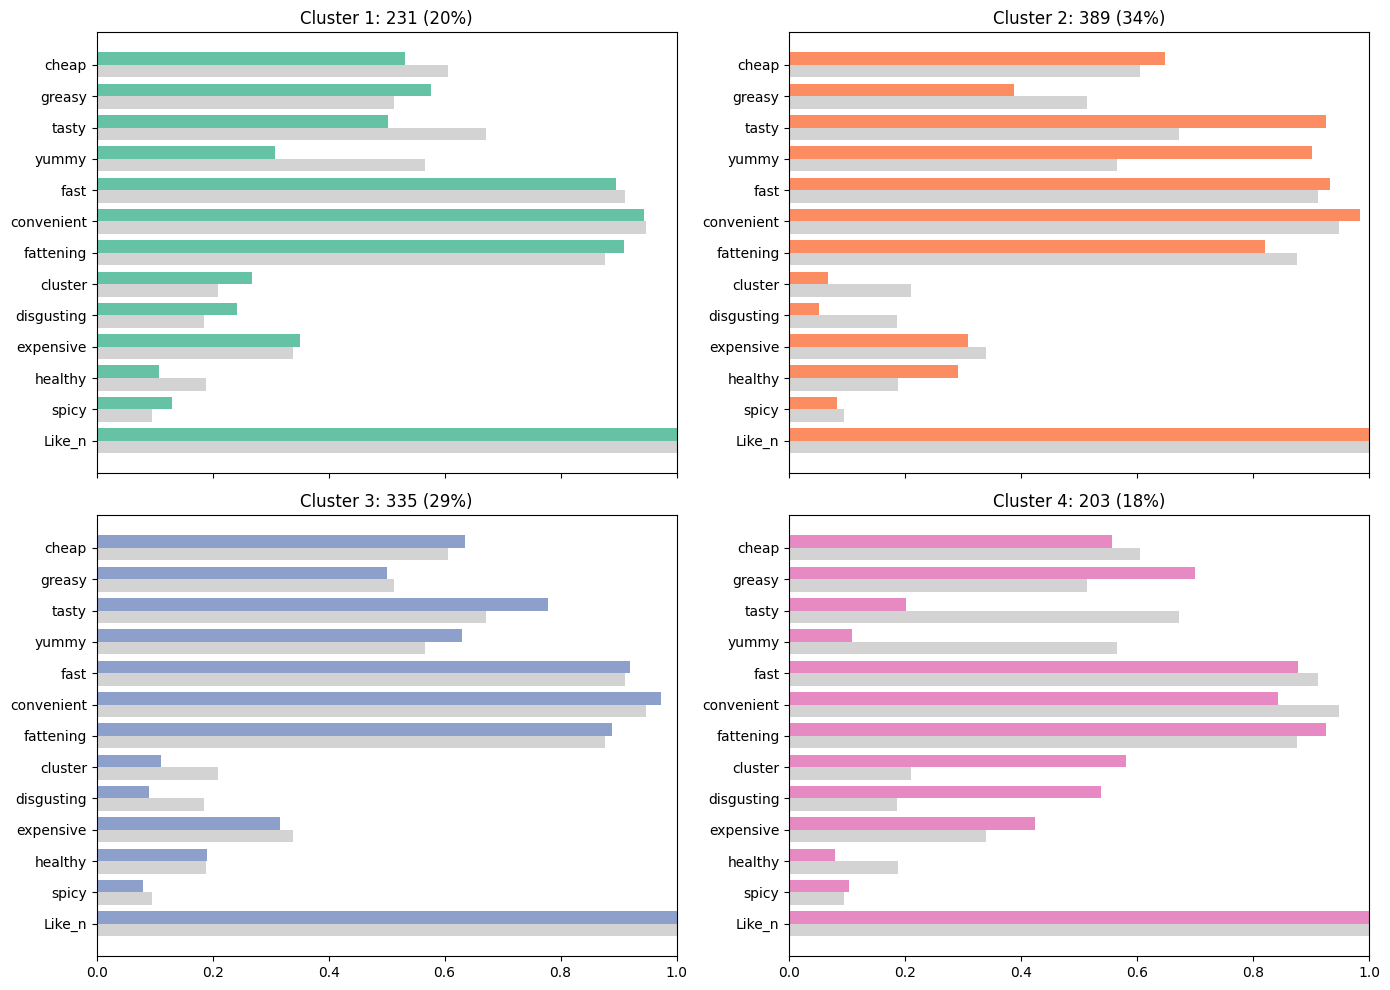

In [59]:
# Set up plot
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True)
axes = axes.flatten()
colors = sns.color_palette("Set2", n_colors=4)

for idx, cluster_id in enumerate(sorted(df_bin['Cluster'].unique())):
    ax = axes[idx]
    profile = cluster_profiles[cluster_id].loc[ordered_attributes]
    y = np.arange(len(ordered_attributes))
    
    # Grey bars for overall means
    ax.barh(y, overall_means[ordered_attributes], color='lightgrey', height=0.4, label='Overall')
    
    # Colored bars for cluster-specific means
    ax.barh(y + 0.4, profile.values, color=colors[cluster_id], height=0.4, label=f'Cluster {cluster_id+1}')
    
    ax.set_yticks(y + 0.2)
    ax.set_yticklabels(ordered_attributes)
    ax.set_xlim(0, 1)
    ax.set_title(f'Cluster {cluster_id+1}: {sum(clusters==cluster_id)} ({100*sum(clusters==cluster_id)/len(clusters):.0f}%)')

plt.tight_layout()
plt.show()


In [60]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Run PCA on the binary attributes (excluding the 'Cluster' column)
pca = PCA(n_components=2)
pca_proj = pca.fit_transform(df_bin.drop('Cluster', axis=1))


In [61]:
# Convert all 'Yes'/'No' or similar binary string values to 1/0
df2 = df1.copy()
df2 = df2.applymap(lambda x: 1 if x == 'Yes' else 0 if x == 'No' else x)

# Ensure everything is numeric
df2= df2.astype(float)


C:\Users\Shrimanth\AppData\Local\Temp\ipykernel_10036\2935742496.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df2 = df2.applymap(lambda x: 1 if x == 'Yes' else 0 if x == 'No' else x)


In [62]:


# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df2)

# Run PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Run KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Prepare dataframe for plotting
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters


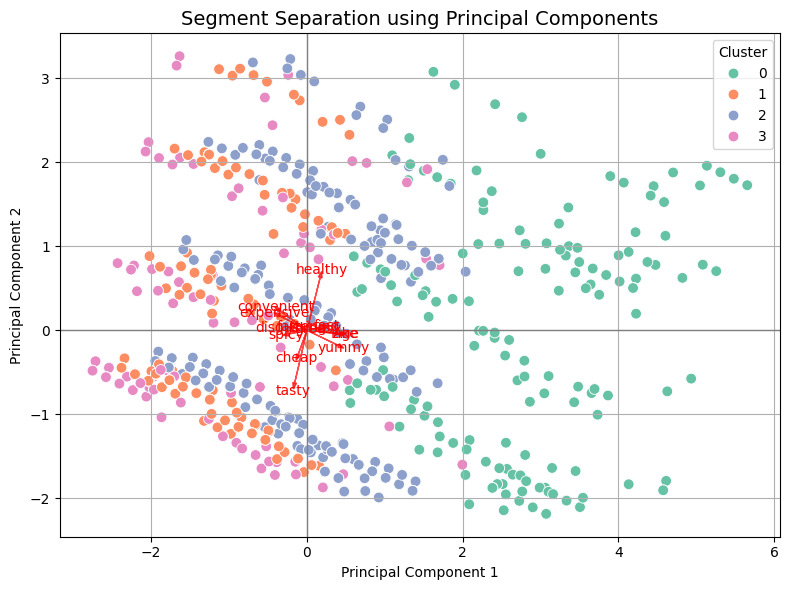

In [63]:
# Plot settings
plt.figure(figsize=(8, 6))
palette = sns.color_palette("Set2", 4)

# Scatterplot of projected clusters
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette=palette, s=60)

# Use correct feature names from PCA input
features = df.columns.tolist()
loadings = pca.components_.T

# Overlay PCA loadings as arrows
for i, feature in enumerate(features):
    if i >= loadings.shape[0]:  # Avoid index errors
        break
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], 
              color='red', alpha=0.7, head_width=0.05)
    plt.text(loadings[i, 0]*1.15, loadings[i, 1]*1.15, feature, 
             color='red', ha='center', va='center', fontsize=10)

# Styling
plt.title("Segment Separation using Principal Components", fontsize=14)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.axhline(0, color='gray', lw=1)
plt.axvline(0, color='gray', lw=1)
plt.grid(True)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

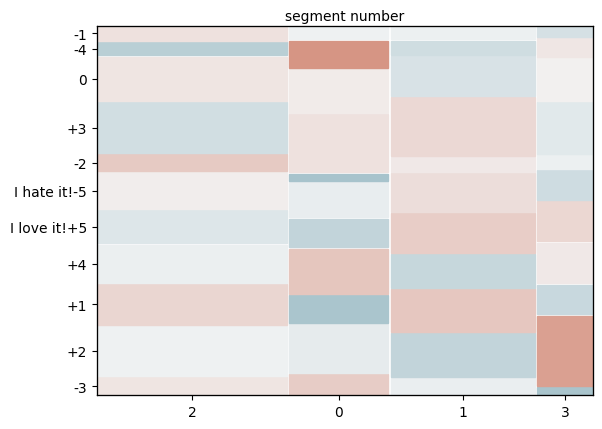

In [64]:
import pandas as pd
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Assuming pca_df['Cluster'] holds the cluster labels from KMeans
# And df1['Like'] holds the ratings or attitudes towards McDonald's
df_mosaic = pd.DataFrame({
    'Cluster': pca_df['Cluster'].astype(str),  # Convert to string for labeling
    'Like': df['Like']
})

# Cross-tabulate (contingency table)
contingency_table = pd.crosstab(df_mosaic['Cluster'], df_mosaic['Like'])

# Compute chi-squared test to get standardized residuals
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Compute standardized residuals
residuals = (contingency_table - expected) / expected**0.5

# Plot the mosaic plot
props = lambda key: {'color': sns.diverging_palette(220, 20, as_cmap=True)(0.5 + 0.15 * residuals.loc[key[0], key[1]])}

plt.figure(figsize=(12, 8))
mosaic(df_mosaic, ['Cluster', 'Like'], title='', labelizer=lambda k: '', properties=props)
plt.xlabel("segment number")
plt.ylabel("I like it")
plt.show()


<Figure size 1000x600 with 0 Axes>

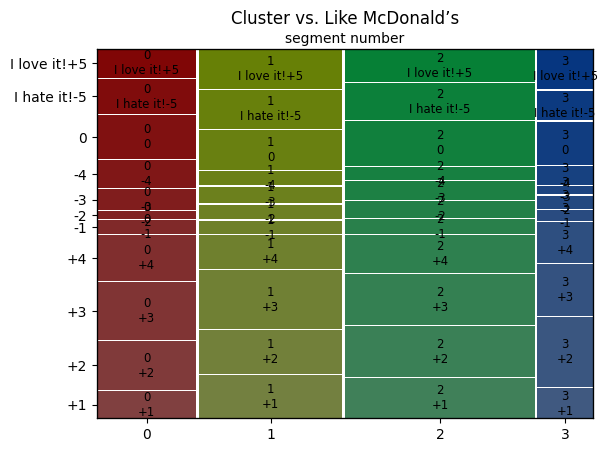

In [65]:
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import pandas as pd

# Cross-tabulate segments vs 'Like'
contingency_table = pd.crosstab(pca_df['Cluster'], df['Like'])

# Chi-squared test for shading
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Create mosaic plot
plt.figure(figsize=(10, 6))
mosaic(contingency_table.stack(), title='Cluster vs. Like McDonald’s')
plt.xlabel('segment number')
plt.show()


<Figure size 800x500 with 0 Axes>

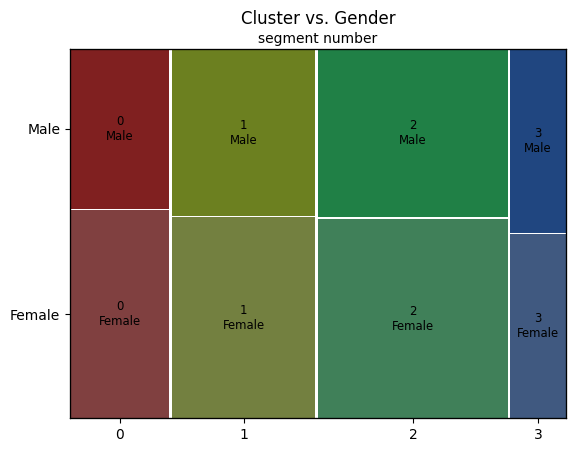

In [66]:
# Cross-tabulate segments vs Gender
contingency_table_gender = pd.crosstab(pca_df['Cluster'], df['Gender'])

# Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table_gender)

# Mosaic plot
plt.figure(figsize=(8, 5))
mosaic(contingency_table_gender.stack(), title='Cluster vs. Gender')
plt.xlabel('segment number')
plt.show()


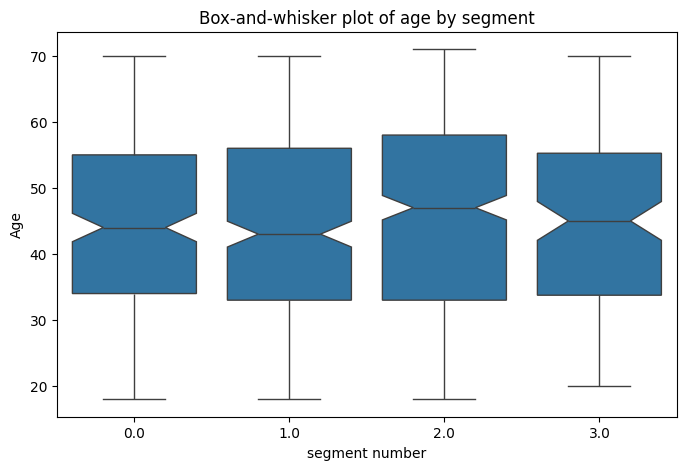

In [67]:
import seaborn as sns

# Combine cluster labels and age
df_age = pd.DataFrame({'Cluster': pca_df['Cluster'], 'Age': df['Age']})

# Boxplot with notches 
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_age, x='Cluster', y='Age', notch=True)
plt.xlabel('segment number')
plt.title('Box-and-whisker plot of age by segment')
plt.show()


In [69]:
from sklearn.cluster import KMeans

# Select numeric features only
X_kmeans = df[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast',
               'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']].copy()

# Encode categorical data if needed (e.g., 'No'/'Yes' → 0/1)
for col in X_kmeans.columns:
    if X_kmeans[col].dtype == 'object':
        X_kmeans[col] = LabelEncoder().fit_transform(X_kmeans[col])

# Run k-means
kmeans = KMeans(n_clusters=4, random_state=42)
df['k4'] = kmeans.fit_predict(X_kmeans) + 1  # +1 to match R's cluster labels (1 to 4)


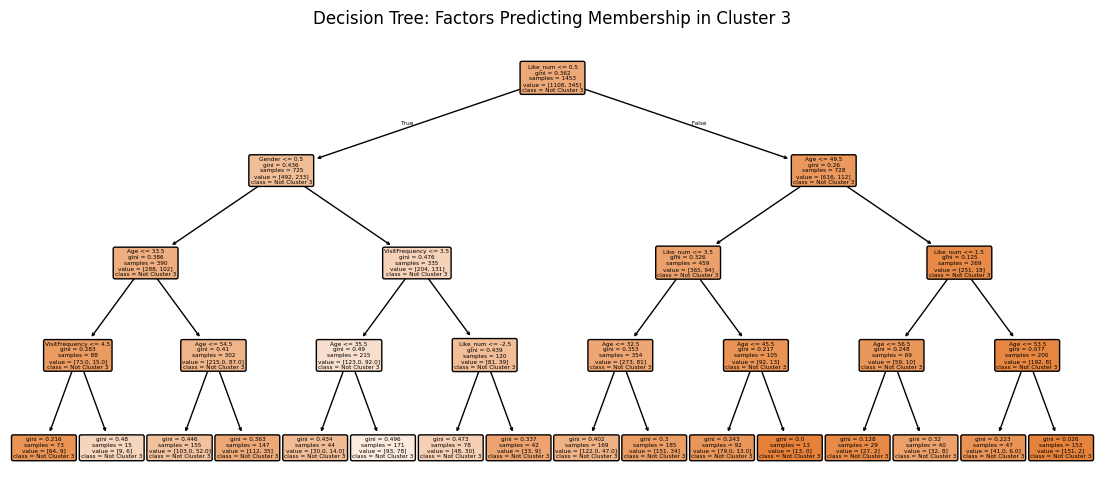

In [71]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Step 1: Define binary target (is cluster 3 or not)
df['is_cluster3'] = (df['k4'] == 3).astype(int)

# Step 2: Prepare feature matrix
X = df[['Like_num', 'Age', 'VisitFrequency', 'Gender']].copy()

# Step 3: Encode categorical columns
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = LabelEncoder().fit_transform(X[col])

# Step 4: Define target variable
y = df['is_cluster3']

# Step 5: Train decision tree
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X, y)

# Step 6: Plot the tree
plt.figure(figsize=(14, 6))
plot_tree(tree, feature_names=X.columns, class_names=['Not Cluster 3', 'Cluster 3'],
          filled=True, rounded=True)
plt.title("Decision Tree: Factors Predicting Membership in Cluster 3")
plt.show()


In [73]:
# Example mapping: adjust values based on your context
frequency_map = {
    'Every day': 30,
    'Every week': 4,
    'Every two weeks': 2,
    'Every three weeks': 1.33,
    'Every month': 1,
    'Every two months': 0.5,
    'Every three months': 0.33,
    'Never': 0
}

# Apply the mapping
df['VisitFrequency_numeric'] = df['VisitFrequency'].map(frequency_map)

# Compute mean visit frequency per segment
visit = df.groupby('k4')['VisitFrequency_numeric'].mean()

print(visit)


k4
1    0.322979
2    0.306087
3    0.212308
4    0.172966
Name: VisitFrequency_numeric, dtype: float64


In [74]:
# Compute mean liking score per cluster (equivalent to R's tapply)
like = df.groupby('k4')['Like_n'].mean()

print(like)


k4
1    3.838323
2    3.921371
3    5.937743
4    6.983193
Name: Like_n, dtype: float64


In [75]:
# Compute proportion of females in each cluster
df['is_female'] = (df['Gender'] == 'Female').astype(int)
female = df.groupby('k4')['is_female'].mean()

print(female)


k4
1    0.492386
2    0.594010
3    0.452174
4    0.574194
Name: is_female, dtype: float64


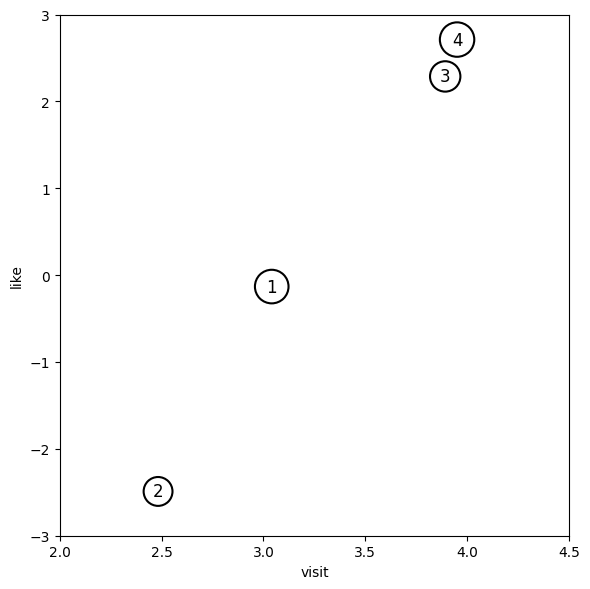

In [77]:
import matplotlib.pyplot as plt

# Define data for each cluster
visit = [3.040426, 2.482490, 3.891975, 3.950249]
like = [-0.1319149, -2.4902724, 2.2870370, 2.7114428]
female = [0.5851064, 0.4319066, 0.4783951, 0.6144279]

# Create figure
plt.figure(figsize=(6, 6))

# Bubble plot
plt.scatter(visit, like, s=[f * 1000 for f in female], color='white', edgecolors='black', linewidths=1.5)

# Add cluster number labels at bubble centers
for i, (x, y) in enumerate(zip(visit, like), start=1):
    plt.text(x, y, str(i), ha='center', va='center', fontsize=12)

# Axis limits to match R plot
plt.xlim(2, 4.5)
plt.ylim(-3, 3)

# Axis labels
plt.xlabel("visit")
plt.ylabel("like")

# No extra styling (to mimic R's minimal theme)
plt.grid(False)
plt.box(True)
plt.tight_layout()
plt.show()
